In [1]:
Pkg.add("Interpolations")

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


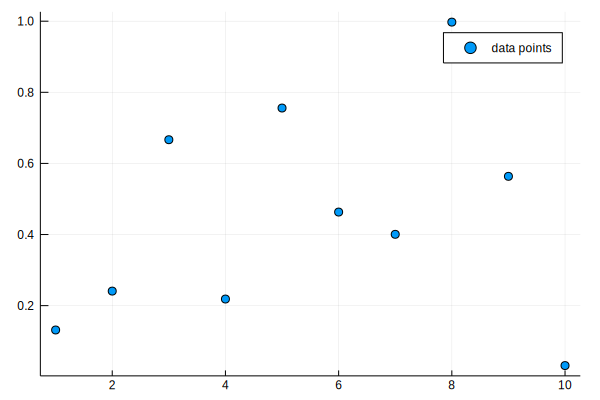

In [25]:
using Plots
xs =  1:1:10
A = [rand() for x in xs]
scatter(xs,A, label="data points")

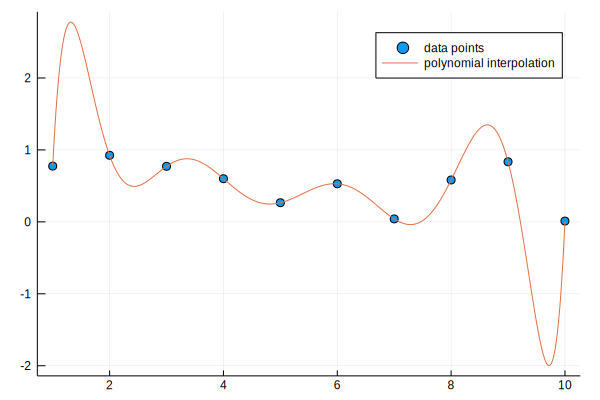

In [3]:
xsf=1:0.01:10
# interpolacja wielomianowa w pakiecie Polynomials
using Polynomials
fit1=polyfit(xs, A)
B=[fit1(x) for x in xsf]
plot!(xsf,B, label="polynomial interpolation")

In [2]:
function interpolacja_lagrange(x,table_x,table_y)
    Wynik=0
    for (k, value) in enumerate(table_x)
        t=1.0
        for (j, value2) in enumerate(table_y)
            if j!=k
                t=t*(x-table_x[j])/(table_x[k]-table_x[j])
            end
        end
        Wynik+=t*table_y[k]
    end
    return Wynik
end

interpolacja_lagrange (generic function with 1 method)

In [3]:
function interpolacja_newtona(x,table_x,table_y)
    l = length(table_x)
    d = Array{Float64}(undef, l)
    for i in 1:l
        d[i]=table_y[i]
    end
    
    for i in 2:l
        for j in l:-1:i
            d[j]=(d[j]-d[j-1])/(table_x[j]-table_x[j-i+1])
        end
    end
    
    res = d[1]
    for i in 2:l
        tmp = 1
        for j in 1:i-1
            tmp*=(x-table_x[j])
        end
        res+=(tmp*d[i])
    end
    return res
end

interpolacja_newtona (generic function with 1 method)

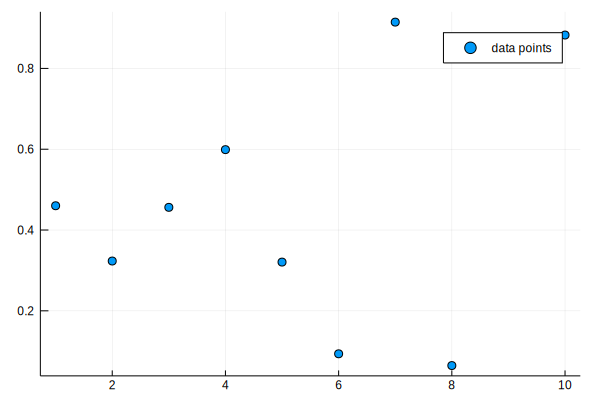

In [25]:
using Plots
xs =  1:1:10
A = [rand() for x in xs]
scatter(xs,A, label="data points")

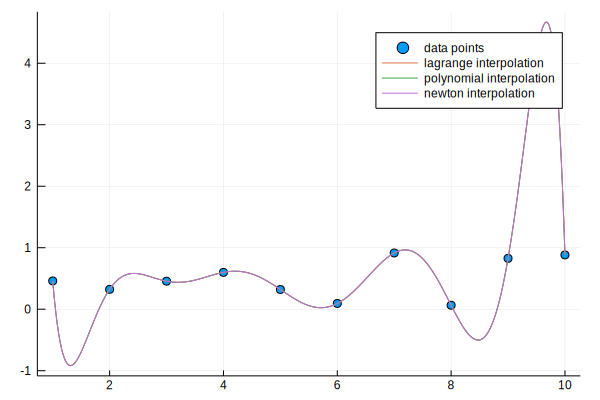

In [26]:
using Polynomials
xsf=1:0.01:10
# interpolacja wielomianowa w pakiecie Polynomials
B=[interpolacja_lagrange(x,xs,A) for x in xsf]
plot!(xsf,B, label="lagrange interpolation")

fit1=polyfit(xs, A)
C=[fit1(x) for x in xsf]
plot!(xsf,C, label="polynomial interpolation")

D=[interpolacja_newtona(x,xs,A) for x in xsf]
plot!(xsf,D, label="newton interpolation")

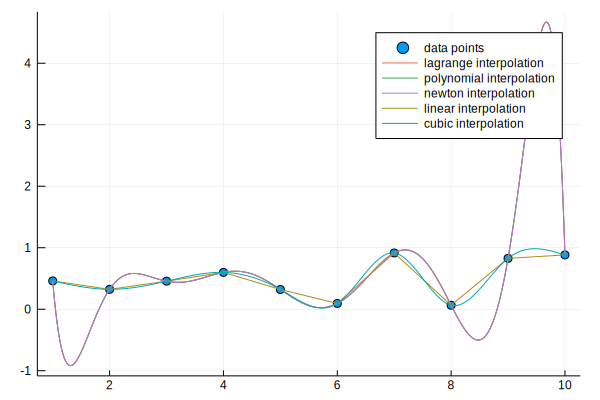

In [27]:
using Interpolations
interp_linear = LinearInterpolation(xs, A)
B=[interp_linear(x) for x in xsf]
plot!(xsf,B, label="linear interpolation")

interp_cubic = CubicSplineInterpolation(xs, A)
B2=[interp_cubic(x) for x in xsf]
plot!(xsf,B2, label="cubic interpolation")

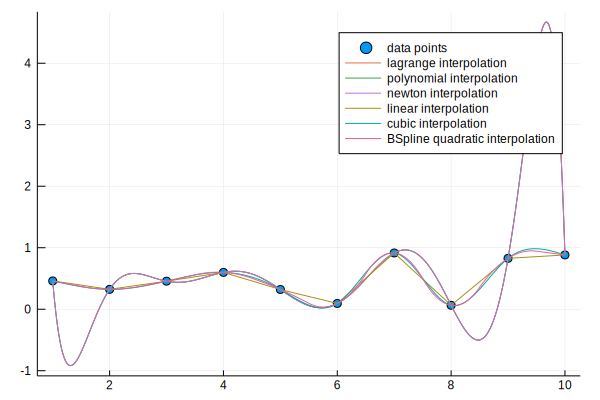

In [28]:
itp = interpolate(A, BSpline(Quadratic(Line(OnCell()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline quadratic interpolation")

In [6]:
function times_lagrange_fun(xs,A)
times_lagrange = Array{Float64}(undef, 10)
size = length(xs)
xsf=1:0.01:size
    for j = 1:10
        times_lagrange[j] = @elapsed [interpolacja_lagrange(x,xs,A) for x in xsf]
    end
    return times_lagrange
end

function times_polynomials_fun(xs,A)
times_polynomials = Array{Float64}(undef, 10)
size = length(xs)
xsf=1:0.01:size
    for j = 1:10
        times_polynomials[j] = @elapsed [fit1(x) for x in xsf]
    end
    return times_polynomials
end

function times_newton_fun(xs,A)
times_newton = Array{Float64}(undef, 10)
size = length(xs)
xsf=1:0.01:size
    for j = 1:10
        times_newton[j] = @elapsed [interpolacja_newtona(x,xs,A) for x in xsf]
    end
    return times_newton
end

times_newton_fun (generic function with 1 method)

In [10]:
ilosc_wezlow=Array{Float64}(undef, 0)
lagrange=Array{Float64}(undef, 0)
newton=Array{Float64}(undef, 0)
polynomial=Array{Float64}(undef, 0)
for i in [c for c in 2:2:40]
    xs=1:1:i
    A = [rand() for x in xs]
    aa = times_lagrange_fun(xs,A);
    bb = times_newton_fun(xs,A);
    cc = times_polynomials_fun(xs,A);
    wezly = [i for n in 1:10]
    ilosc_wezlow = vcat(ilosc_wezlow,wezly);
    lagrange = vcat(lagrange,aa);
    newton= vcat(newton,bb);
    polynomial = vcat(polynomial,cc);
end

In [11]:
using DataFrames, Statistics
abc = DataFrame(Wezly=ilosc_wezlow,Lagrange=lagrange,Newton=newton,Polynomial=polynomial)
prepared = by(abc, :Wezly, :Lagrange => mean, :Newton => mean, :Polynomial => mean, :Lagrange => std, :Newton => std, :Polynomial => std)

,Wezly,Lagrange_mean,Newton_mean,Polynomial_mean,Lagrange_std,Newton_std,Polynomial_std
,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,2.0,4.4799e-6,7.46e-6,3.7399e-6,2.90592e-6,1.24472e-6,1.75011e-6
2,4.0,3.07398e-5,4.15497e-5,8.5099e-6,3.16086e-5,7.14413e-6,1.12877e-6
3,6.0,6.75595e-5,0.000108179,1.33699e-5,1.18439e-5,1.75229e-5,1.42691e-6
4,8.0,0.000168319,0.00110158,2.26799e-5,2.2865e-5,0.00275567,6.7193e-6
5,10.0,0.000366427,0.000439017,2.35298e-5,2.68951e-5,6.01289e-5,1.2693e-6
6,12.0,0.000665005,0.000700115,3.05498e-5,3.977e-5,6.04991e-5,5.1622e-6
7,14.0,0.00106355,0.00101619,3.22197e-5,3.18863e-5,5.17541e-5,5.35797e-6
8,16.0,0.00165082,0.00148387,3.85997e-5,7.00755e-5,6.49402e-5,2.00276e-6
9,18.0,0.00243212,0.00201387,5.64896e-5,8.54698e-5,0.000177446,1.69151e-5


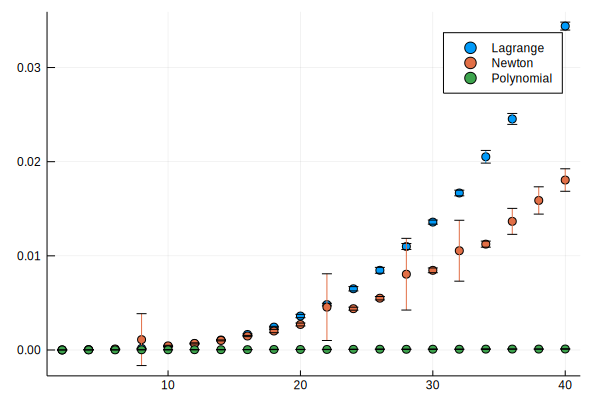

In [12]:
using Plots
scatter(prepared[:Wezly],prepared[:Lagrange_mean],yerr=prepared[:Lagrange_std], label = "Lagrange")
scatter!(prepared[:Wezly],prepared[:Newton_mean],yerr=prepared[:Newton_std], label = "Newton")
scatter!(prepared[:Wezly],prepared[:Polynomial_mean],yerr=prepared[:Polynomial_std], label = "Polynomial")

In [13]:
function rungy(x)
    return 1/(1+25*x^2)
end

rungy (generic function with 1 method)

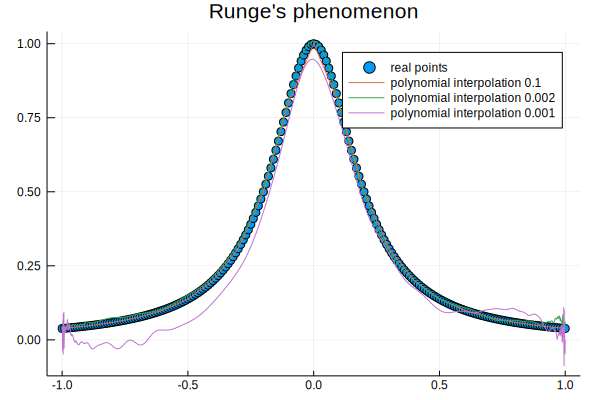

In [20]:
using Plots
xs = -1:0.01:1
ys_poprawne=[rungy(x) for x in xs]
scatter(xs,ys_poprawne, label ="real points",title = "Runge's phenomenon")

using Polynomials
xsf = -1:0.1:1
ys_fit01 = [rungy(x) for x in xsf]
fit1=polyfit(xsf, ys_fit01)
B=[fit1(x) for x in xsf]
plot!(xsf,B, label="polynomial interpolation 0.1")

xsf = -1:0.002:1
ys_fit002 = [rungy(x) for x in xsf]
fit1=polyfit(xsf, ys_fit002)
C=[fit1(x) for x in xsf]
plot!(xsf,C, label="polynomial interpolation 0.002")

xsf = -1:0.001:1
ys_fit001 = [rungy(x) for x in xsf]
fit1=polyfit(xsf, ys_fit001)
D=[fit1(x) for x in xsf]
plot!(xsf,D, label="polynomial interpolation 0.001")